# 以梯度下降法求解羅吉斯迴歸

## 載入相關套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## 載入資料集

In [2]:
iris = datasets.load_iris()

# 只取前兩個特徵，方便繪圖
X = iris.data[:, :2]
# 只取前兩個類別
y = (iris.target != 0) * 1

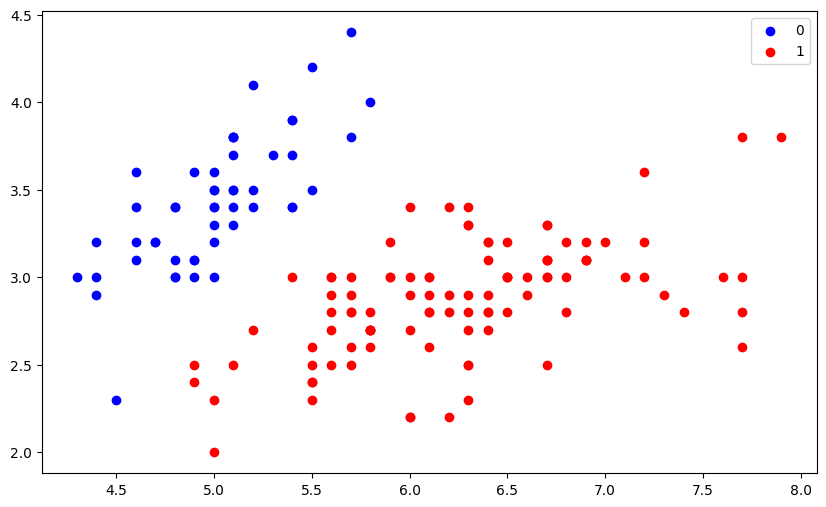

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

## 建立羅吉斯迴歸類別

In [4]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # 加入偏差項(1)至X
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # 羅吉斯函數
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # 損失函數
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # 以梯度下降法訓練模型
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # 權重初始值給 0
        self.theta = np.zeros(X.shape[1])
        
        # 正向傳導與反向傳導
        for i in range(self.num_iter):
            # WX
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            # 梯度
            gradient = np.dot(X.T, (h - y)) / y.size
            # 更新權重
            self.theta -= self.lr * gradient
            
            # 依據更新的權重計算損失
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
            
            # 列印損失
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # 預測機率
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    # 預測
    def predict(self, X):
        return self.predict_prob(X).round()

## 模型訓練

In [5]:
model = LogisticRegression(lr=0.1, num_iter=100000)

%time model.fit(X, y)

CPU times: total: 3.64 s
Wall time: 3.64 s


## 預測

In [6]:
preds = model.predict(X)
(preds == y).mean()

0.9933333333333333

## 羅吉斯迴歸係數

In [7]:
model.theta

array([-14.49849471,   9.33914805, -11.61365201])

## 分類結果繪圖

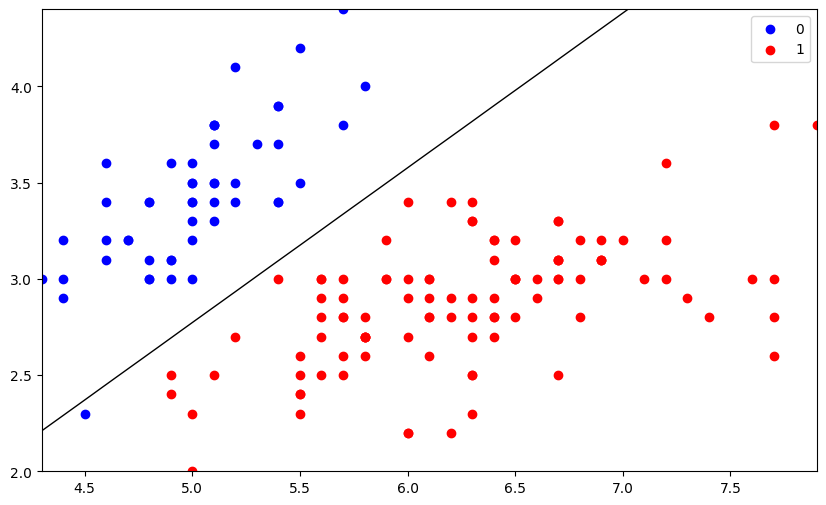

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

## 以 Scikit-learn 驗證

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e20)
%time model.fit(X, y)

CPU times: total: 0 ns
Wall time: 5.03 ms


LogisticRegression(C=1e+20)

In [15]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [16]:
model.intercept_, model.coef_

(array([-276.67727716]), array([[ 134.80324426, -147.37951668]]))

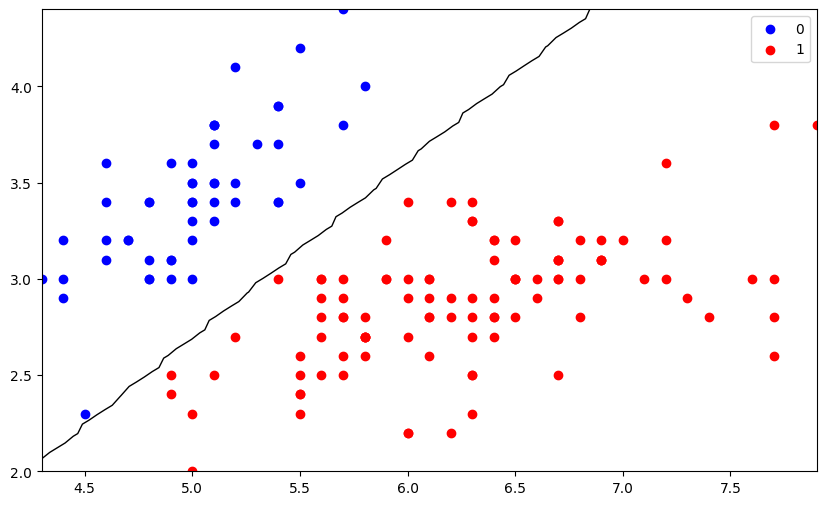

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_proba(grid)[:,1].reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [31]:
model = LogisticRegression(C=1e20, solver='sag')
model.fit(X, y)
model.intercept_, model.coef_

C:\Users\mikec\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([-2.47080293]), array([[ 5.57874346, -8.89150438]]))

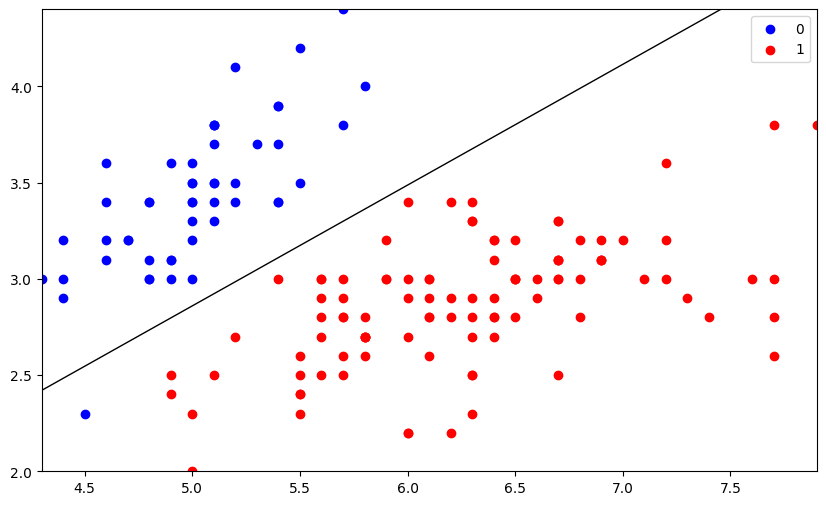

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_proba(grid)[:,1].reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');